In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from decimal import Decimal

In [2]:
df=pd.read_csv('data/h1b_kaggle.csv',index_col='Unnamed: 0')
df.head()

C:\Users\HOME\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [3]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [4]:
df.shape

(3002458, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3002458 entries, 1 to 3002458
Data columns (total 10 columns):
CASE_STATUS           object
EMPLOYER_NAME         object
SOC_NAME              object
JOB_TITLE             object
FULL_TIME_POSITION    object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE              object
lon                   float64
lat                   float64
dtypes: float64(4), object(6)
memory usage: 252.0+ MB


In [6]:
df.isnull().sum()

CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.shape

(2877765, 10)

In [9]:
df_unique=df.apply(pd.Series.nunique)

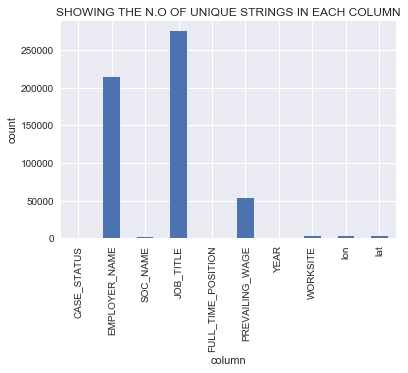

In [10]:
sns.set()
df_unique.plot(kind='bar')
plt.title('SHOWING THE N.O OF UNIQUE STRINGS IN EACH COLUMN')
plt.xlabel('column')
plt.ylabel('count')

TOP  20 EMPLOYERS IN AMERICA

In [11]:
Employer_Rank=df['EMPLOYER_NAME'].value_counts()
df_rank=pd.DataFrame(Employer_Rank)
df_rank.head(20)

,EMPLOYER_NAME
INFOSYS LIMITED,130257
TATA CONSULTANCY SERVICES LIMITED,64273
WIPRO LIMITED,45673
DELOITTE CONSULTING LLP,35999
IBM INDIA PRIVATE LIMITED,33585
ACCENTURE LLP,33226
MICROSOFT CORPORATION,25551
"HCL AMERICA, INC.",22488
ERNST & YOUNG U.S. LLP,18094
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION,17322


In [12]:
df_rank.shape

(214982, 1)

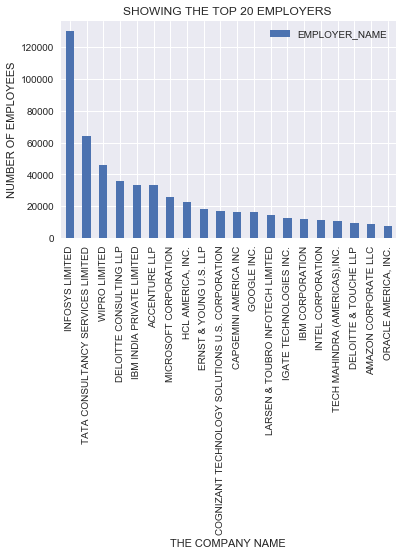

In [13]:
df_rank.head(20).plot(kind='bar')
plt.title('SHOWING THE TOP 20 EMPLOYERS ')
plt.xlabel('THE COMPANY NAME ')
plt.ylabel('NUMBER OF EMPLOYEES')

In [14]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


# comonly paid wages in our companies

In [15]:
pd.DataFrame(
    df.PREVAILING_WAGE.value_counts().sort_values(ascending=False).head(30))

,PREVAILING_WAGE
60000.0,10185
55245.0,6745
62566.0,6480
58053.0,5683
52499.0,5492
51730.0,5407
63877.0,5377
65042.0,5276
55370.0,4961
67808.0,4646


# what an average empolyer earns

In [16]:
df.PREVAILING_WAGE.mean()

145166.64888402403

# top paying camponies

In [17]:
pay=df.groupby(['EMPLOYER_NAME']).mean()

In [18]:
pay['PREVAILING_WAGE'].sort_values(ascending=False).head(30)

EMPLOYER_NAME
OMPI OF AMERICA INC.                              2.129878e+08
INNOBOX SYSTEMS                                   1.723634e+08
BAALAAJEE INC.                                    1.434408e+08
DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS            1.347021e+08
BAYSHORE GLOBAL MANAGEMENT LLC                    1.262358e+08
MANHATTAN SOFTWARE, INC.                          1.239077e+08
GYM-PACT CORP                                     1.233898e+08
BOOKRENTER.COM, INC.                              1.230321e+08
CATANIA, MAHON, MILLIGRAM &AMP; RIDER, PLLC       1.226971e+08
AGROPLASMA, INC                                   1.221334e+08
AQUA LUNG AMERICA INC.                            1.181107e+08
AV INVESTMENT COMPANY, INC.                       1.159038e+08
BRONX LIGHTHOUSE CHARTER SCHOOL                   1.124240e+08
E AND D MEDIA INC.                                1.098240e+08
TAMPA BAY DIGITAL DESIGN EXPERTS, LLC             1.070435e+08
XANTREX TECHNOLOGY, INC.                 

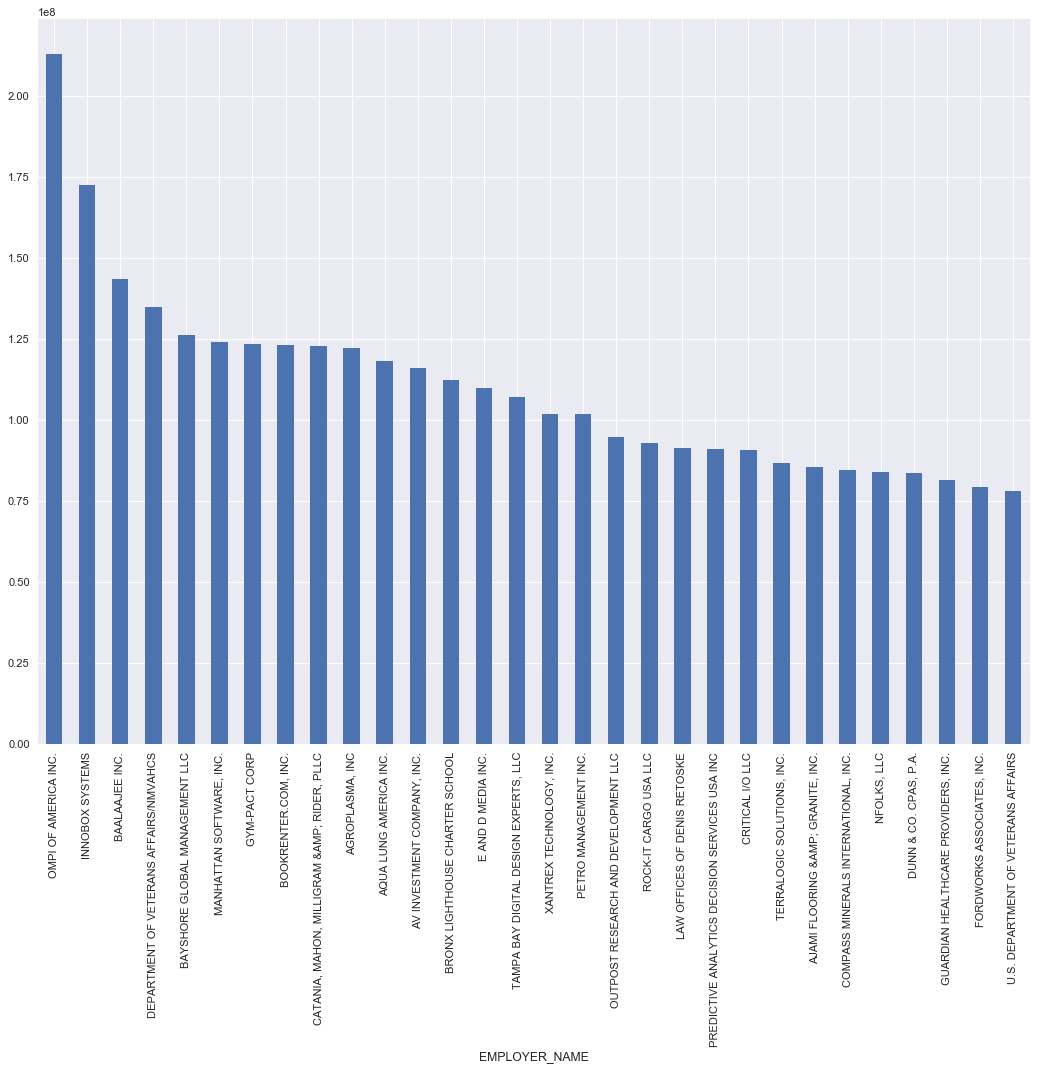

In [19]:
plt.figure(figsize=(16,12), dpi=80, facecolor="w", edgecolor="k")
pay['PREVAILING_WAGE'].nlargest(30).plot(kind='bar')

# City Ranking on employerbility

In [20]:
df_C=df['WORKSITE'].value_counts()
df_C.head(30)

NEW YORK, NEW YORK                  190863
HOUSTON, TEXAS                       83385
SAN FRANCISCO, CALIFORNIA            62457
ATLANTA, GEORGIA                     52008
CHICAGO, ILLINOIS                    51167
SAN JOSE, CALIFORNIA                 49582
SUNNYVALE, CALIFORNIA                34968
DALLAS, TEXAS                        31509
BOSTON, MASSACHUSETTS                31336
REDMOND, WASHINGTON                  30574
CHARLOTTE, NORTH CAROLINA            30176
IRVING, TEXAS                        29316
MOUNTAIN VIEW, CALIFORNIA            29245
SAN DIEGO, CALIFORNIA                28656
SANTA CLARA, CALIFORNIA              27945
JERSEY CITY, NEW JERSEY              26822
SEATTLE, WASHINGTON                  26745
AUSTIN, TEXAS                        26695
LOS ANGELES, CALIFORNIA              26393
PHILADELPHIA, PENNSYLVANIA           24104
PHOENIX, ARIZONA                     21324
BELLEVUE, WASHINGTON                 21224
PLANO, TEXAS                         20663
WASHINGTON,

# creating a column called states

In [21]:
def states(x):
    if x==np.NaN or x=='NaN' or x==np.nan:
        return 'Nairobi'
    
    return x.split(',')[1][1:]

df['STATE']=df['WORKSITE'].apply(states)

In [22]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,STATE
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826,MICHIGAN
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843,TEXAS
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158,NEW JERSEY
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236,COLORADO
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003,MISSOURI


In [23]:
'Nairobi' in df['STATE']

False

In [24]:
df.STATE.isnull().any()

False

# getting the number of states

In [25]:
df['STATE'].nunique()

53

In [26]:
df['STATE'].unique()

array(['MICHIGAN', 'TEXAS', 'NEW JERSEY', 'COLORADO', 'MISSOURI',
       'FLORIDA', 'CALIFORNIA', 'VIRGINIA', 'PENNSYLVANIA', 'WISCONSIN',
       'ILLINOIS', 'DISTRICT OF COLUMBIA', 'NORTH CAROLINA',
       'RHODE ISLAND', 'OHIO', 'WASHINGTON', 'GEORGIA', 'NEW YORK',
       'INDIANA', 'MARYLAND', 'MASSACHUSETTS', 'NEVADA', 'NEW HAMPSHIRE',
       'LOUISIANA', 'MINNESOTA', 'SOUTH CAROLINA', 'ARIZONA', 'TENNESSEE',
       'HAWAII', 'UTAH', 'DELAWARE', 'NA', 'KANSAS', 'CONNECTICUT',
       'MAINE', 'OKLAHOMA', 'ARKANSAS', 'PUERTO RICO', 'ALASKA', 'IOWA',
       'OREGON', 'KENTUCKY', 'NEBRASKA', 'NEW MEXICO', 'WEST VIRGINIA',
       'SOUTH DAKOTA', 'NORTH DAKOTA', 'MISSISSIPPI', 'ALABAMA', 'VERMONT',
       'IDAHO', 'WYOMING', 'MONTANA'], dtype=object)

# number of applications recieved by a state

In [27]:
pd.DataFrame(df.STATE.value_counts().sort_values(ascending=False))

,STATE
CALIFORNIA,548539
TEXAS,286704
NEW YORK,282429
NEW JERSEY,206876
ILLINOIS,154843
MASSACHUSETTS,112659
PENNSYLVANIA,103729
WASHINGTON,100754
FLORIDA,100384
GEORGIA,99679


In [28]:
df.columns=df.columns.str.upper()

In [29]:
df.columns

Index(['CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'LON',
       'LAT', 'STATE'],
      dtype='object')

 <h3>converting year and wages to ints ,longoitude ad Lat to 2DP<h3\>

In [30]:
df['LON']=df['LON'].apply(lambda x : round(x,2))
df['LAT']=df['LAT'].apply(lambda x : round(x,2))
df['YEAR']=df['YEAR'].apply(lambda x : int(x))
df['PREVAILING_WAGE']=df['PREVAILING_WAGE'].apply(lambda x : int(x))

In [31]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,LON,LAT,STATE
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016,"ANN ARBOR, MICHIGAN",-83.74,42.28,MICHIGAN
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,2016,"PLANO, TEXAS",-96.70,33.02,TEXAS
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,2016,"JERSEY CITY, NEW JERSEY",-74.08,40.73,NEW JERSEY
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,2016,"DENVER, COLORADO",-104.99,39.74,COLORADO
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518,2016,"ST. LOUIS, MISSOURI",-90.20,38.63,MISSOURI


<h3> looking at CASE_STATUS we see that it is An object lets convert it to categorical

In [32]:
df[['CASE_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877765 entries, 1 to 3002445
Data columns (total 1 columns):
CASE_STATUS    object
dtypes: object(1)
memory usage: 123.9+ MB


In [33]:
df['CASE_STATUS']=df.CASE_STATUS.astype('category')

<h3>on checking the infomation againg we get that its dtype is now category amd there is areduce in memory size

In [34]:
df[['CASE_STATUS']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2877765 entries, 1 to 3002445
Data columns (total 1 columns):
CASE_STATUS    category
dtypes: category(1)
memory usage: 104.7 MB


<h4>checking the unique CASE_STATUS availabe

In [35]:
df['CASE_STATUS'].unique()

[CERTIFIED-WITHDRAWN, WITHDRAWN, CERTIFIED, DENIED, REJECTED, INVALIDATED, PENDING QUALITY AND COMPLIANCE REVIEW - UNASSI...]
Categories (7, object): [CERTIFIED-WITHDRAWN, WITHDRAWN, CERTIFIED, DENIED, REJECTED, INVALIDATED, PENDING QUALITY AND COMPLIANCE REVIEW - UNASSI...]

In [36]:
df.CASE_STATUS.nunique(),len(df['CASE_STATUS'].unique())

(7, 7)

<h4> getteing the count of each status 

In [37]:
df['CASE_STATUS'].value_counts()

CERTIFIED                                             2512114
CERTIFIED-WITHDRAWN                                    195721
DENIED                                                  85161
WITHDRAWN                                               84752
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    1
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

<h4> plotibg this guys in a piechart 

In [38]:
Pie=df['CASE_STATUS'].value_counts()

In [39]:
Pie[:4]

CERTIFIED              2512114
CERTIFIED-WITHDRAWN     195721
DENIED                   85161
WITHDRAWN                84752
Name: CASE_STATUS, dtype: int64

In [40]:
pie=Pie[:4]
others=Pie[4:]
others

PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED    15
REJECTED                                               1
INVALIDATED                                            1
Name: CASE_STATUS, dtype: int64

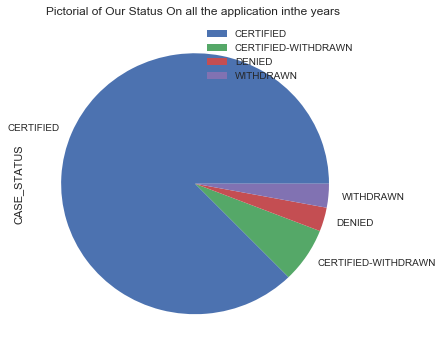

In [41]:
plt.figure(figsize=(6,6))

pie.plot(kind='pie')
plt.title('Pictorial of Our Status On all the application inthe years ')
plt.legend(loc='upper right')

<h4>getting the number of applications each year

In [42]:
years=list(df['YEAR'].unique())

In [43]:
years=sorted(years)
years

[2011, 2012, 2013, 2014, 2015, 2016]

In [44]:
status_per_years=[0]*len(years)

In [45]:
len(years),len(status_per_years)

(6, 6)

In [46]:
for i,j in enumerate(years) :
    status_per_years[i]=len(df[df['YEAR']==j])
status_per_years    

[333625, 394267, 422427, 498027, 600120, 629299]

In [47]:
len(years)==len(status_per_years)

True

<h4> ploting the n.o of pettition each year in seaborn can be done in two ways we start with the easy one

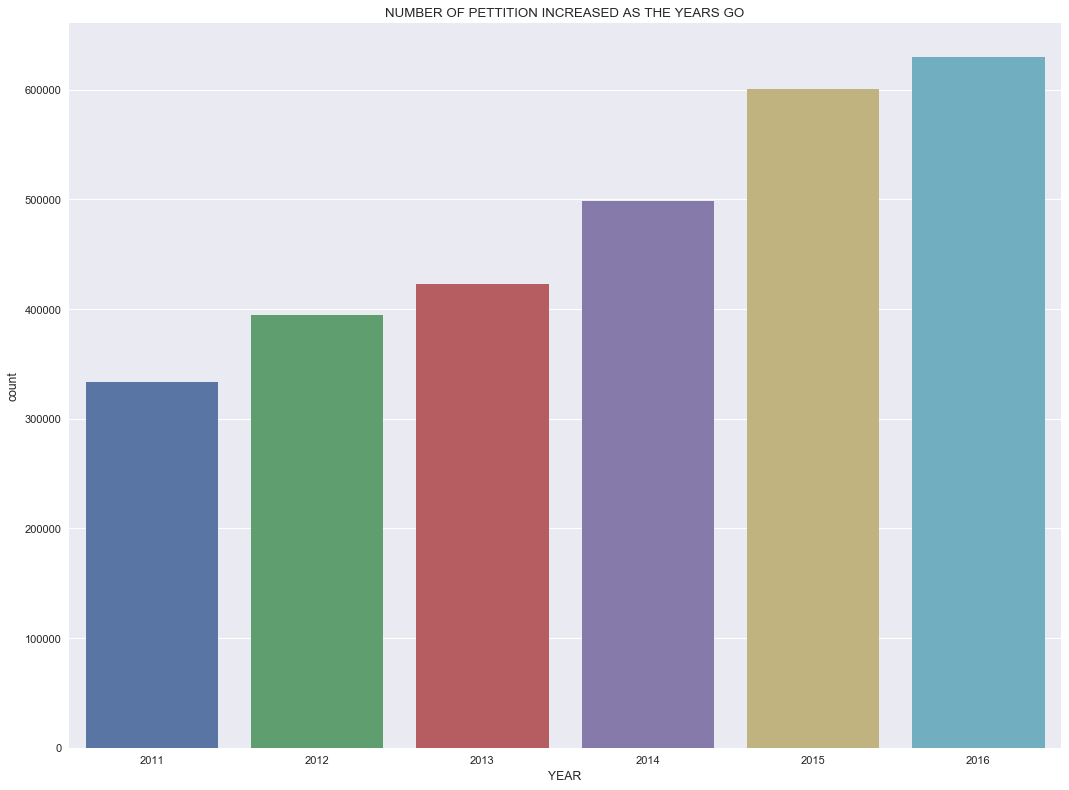

In [48]:
plt.figure(figsize=(16,12), dpi=80, facecolor="w", edgecolor="k")
sns.countplot(df['YEAR'])
#plt.legend(['2011','2012','2013','2014','2016'],loc='upper left')
plt.title('NUMBER OF PETTITION INCREASED AS THE YEARS GO')

<h3>Creating bar plot by use of pandas series 

In [49]:
DF=pd.DataFrame({'count':status_per_years})
#leaving years out since we wanna use it to index
DF

,count
0,333625
1,394267
2,422427
3,498027
4,600120
5,629299


In [50]:
DF.index=years
DF

,count
2011,333625
2012,394267
2013,422427
2014,498027
2015,600120
2016,629299


In [51]:
type(DF['count'])

pandas.core.series.Series

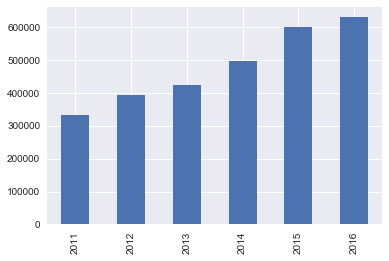

In [52]:
DF['count'].plot(kind='bar')

In [53]:
df.CASE_STATUS.unique()

[CERTIFIED-WITHDRAWN, WITHDRAWN, CERTIFIED, DENIED, REJECTED, INVALIDATED, PENDING QUALITY AND COMPLIANCE REVIEW - UNASSI...]
Categories (7, object): [CERTIFIED-WITHDRAWN, WITHDRAWN, CERTIFIED, DENIED, REJECTED, INVALIDATED, PENDING QUALITY AND COMPLIANCE REVIEW - UNASSI...]

# concetrating on denied and certicfied 

In [54]:
#to plOT denied pettion per year we first creaT a df for denied guys 
DF2=df[df['CASE_STATUS']=='DENIED']

In [55]:
DF2['CASE_STATUS'].unique()

[DENIED]
Categories (1, object): [DENIED]

<H3> BEFFORE PLOTING WE MAY GET THE ACTUAL FIGURES AS YEARS PASS

In [56]:
denied=[0]*len(years)
for i,j in enumerate(years) :
    denied[i]=len(DF2[DF2['YEAR']==j])
denied  

[25986, 18866, 10976, 10816, 10037, 8480]

In [57]:
years

[2011, 2012, 2013, 2014, 2015, 2016]

calling the count plot on the year column of DF2

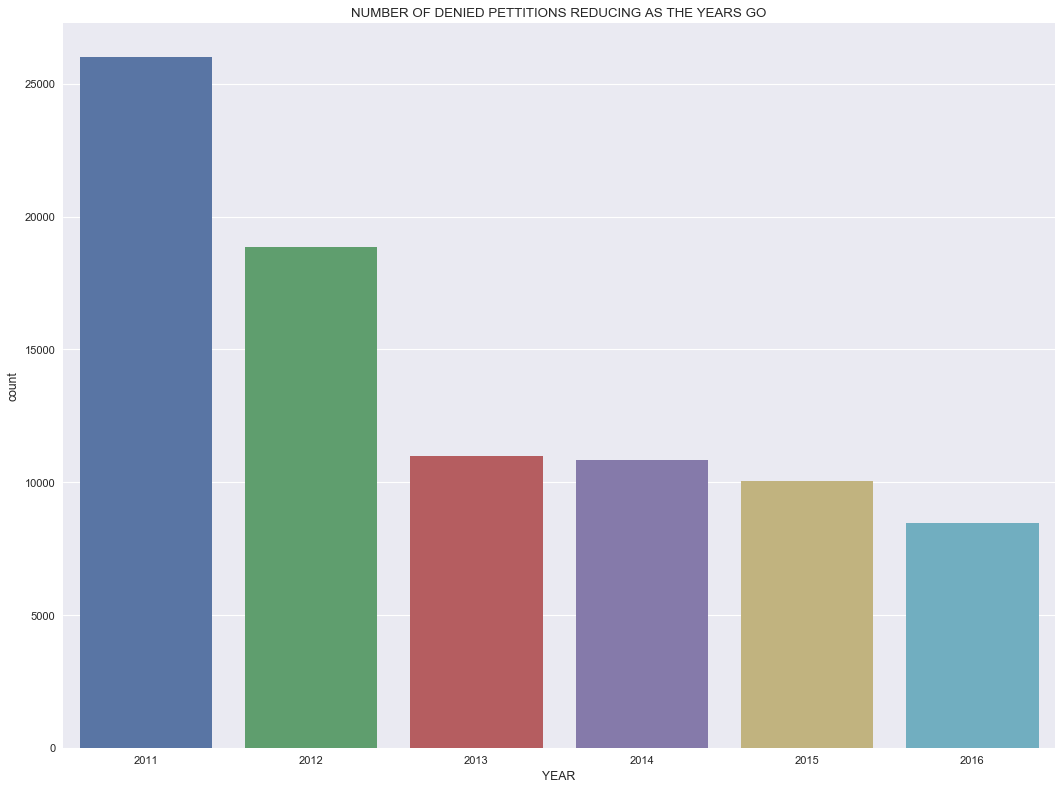

In [58]:
plt.figure(figsize=(16,12), dpi=80, facecolor="w", edgecolor="k")
sns.countplot(DF2['YEAR'])
plt.title('NUMBER OF DENIED PETTITIONS REDUCING AS THE YEARS GO')

proceeding in asimilar manner we get the certisfied pettiotion pot over the years

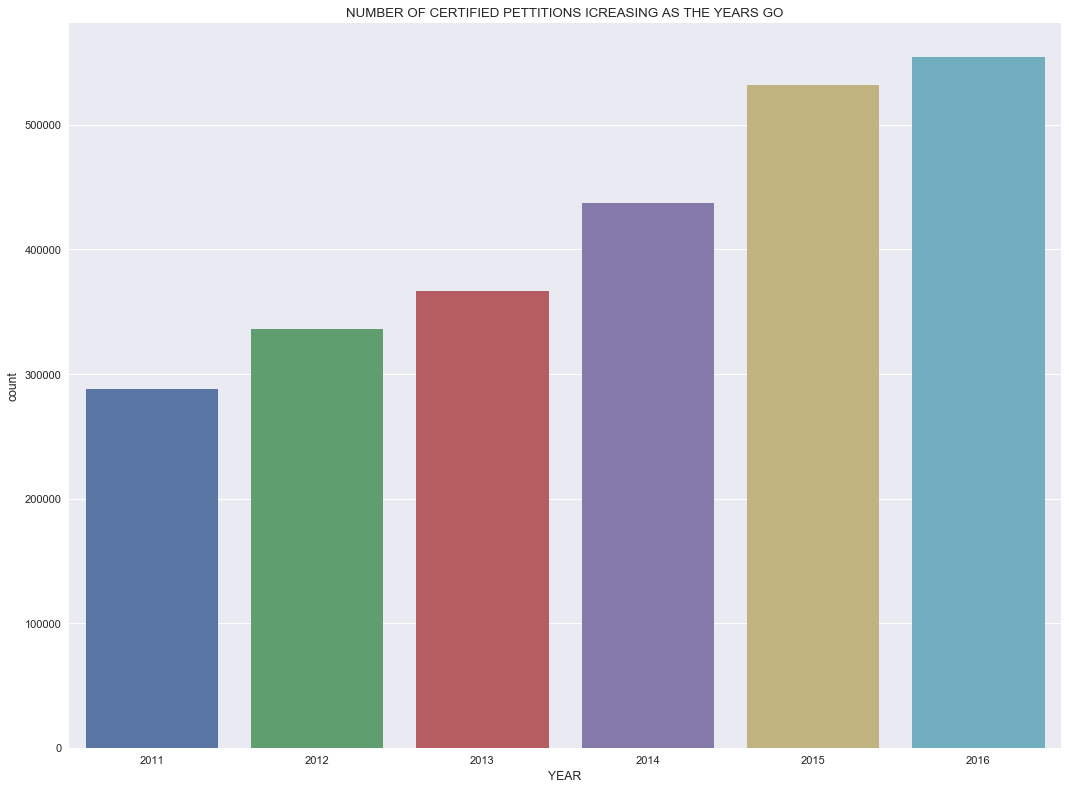

In [59]:
DF3=df[df['CASE_STATUS']=='CERTIFIED']
plt.figure(figsize=(16,12), dpi=80, facecolor="w", edgecolor="k")
sns.countplot(DF3['YEAR'])
plt.title('NUMBER OF CERTIFIED PETTITIONS ICREASING AS THE YEARS GO')

 actual figures

In [60]:
certified=[0]*len(years)
for i,j in enumerate(years) :
    certified[i]=len(DF3[DF3['YEAR']==j])
certified

[287638, 335676, 366384, 436985, 531596, 553835]

# RATES OF DENTING AND CERTIFING A PETTITIONS PER YEAR 

In [61]:
C=np.array(certified)
D=np.array(denied)
T=np.array(status_per_years)

In [62]:
Rate_of_denied=D/T
Rate_of_Certified=C/T

In [63]:
Rate_of_denied,Rate_of_Certified

(array([ 0.07788985,  0.04785082,  0.02598319,  0.0217177 ,  0.01672499,
         0.01347531]),
 array([ 0.86215961,  0.85139258,  0.86733092,  0.87743235,  0.88581617,
         0.88008244]))

In [64]:
DF4=pd.DataFrame({'Rate':Rate_of_denied})#
DF4.index=years
DF4

,Rate
2011,0.077890
2012,0.047851
2013,0.025983
2014,0.021718
2015,0.016725
2016,0.013475


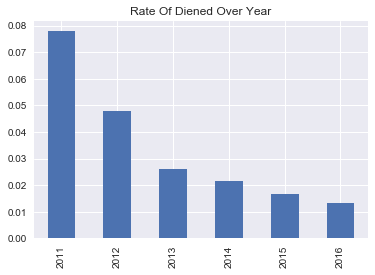

In [65]:
DF4['Rate'].plot(kind='bar')
plt.title('Rate Of Diened Over Year')

In [66]:
DF5=pd.DataFrame({'Rate':Rate_of_Certified})
DF5.index=years
DF5

,Rate
2011,0.862160
2012,0.851393
2013,0.867331
2014,0.877432
2015,0.885816
2016,0.880082


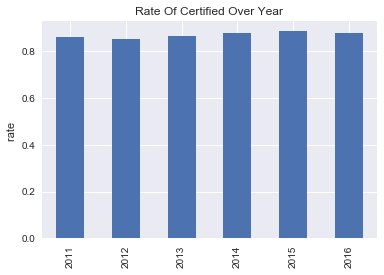

In [67]:
DF5['Rate'].plot(kind='bar')
plt.title('Rate Of Certified Over Year')
plt.ylabel('rate ')

# or we wld choose to first put everything in a dataframe

In [68]:
DF6=pd.DataFrame({'Cert':certified,'Denied':denied,'Total':status_per_years})
DF6.index=years
DF6

,Cert,Denied,Total
2011,287638,25986,333625
2012,335676,18866,394267
2013,366384,10976,422427
2014,436985,10816,498027
2015,531596,10037,600120
2016,553835,8480,629299


# then getting the rate in percentage this way

In [69]:
DF6['%rate_Certified']=DF6['Cert']/DF6['Total']*100
DF6['%rate_Denied']=DF6['Denied']/DF6['Total']*100

In [70]:
DF6

,Cert,Denied,Total,%rate_Certified,%rate_Denied
2011,287638,25986,333625,86.215961,7.788985
2012,335676,18866,394267,85.139258,4.785082
2013,366384,10976,422427,86.733092,2.598319
2014,436985,10816,498027,87.743235,2.171770
2015,531596,10037,600120,88.581617,1.672499
2016,553835,8480,629299,88.008244,1.347531


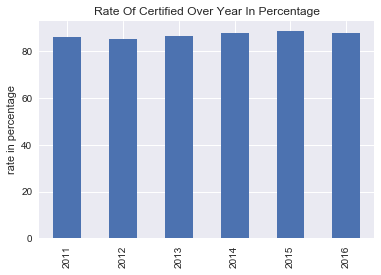

In [71]:
DF6['%rate_Certified'].plot(kind='bar')
plt.title('Rate Of Certified Over Year In Percentage')
plt.ylabel('rate in percentage')

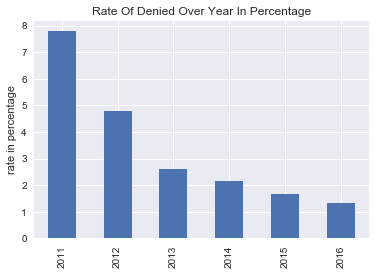

In [72]:
DF6['%rate_Denied'].plot(kind='bar')
plt.title('Rate Of Denied Over Year In Percentage')
plt.ylabel('rate in percentage')

#  now shifting our concentration to the state

we wanna answer several questions 

    1 .the n.o of applications per state and the propotio( to total) a state is receiving
    2. the probotion of this applications per state, we will use bar graph
    3. the rate at which an appliction in a state is Certified ,Decline
    

# top 30 reciepiant states

In [73]:
df['STATE'].value_counts().head(30)

CALIFORNIA              548539
TEXAS                   286704
NEW YORK                282429
NEW JERSEY              206876
ILLINOIS                154843
MASSACHUSETTS           112659
PENNSYLVANIA            103729
WASHINGTON              100754
FLORIDA                 100384
GEORGIA                  99679
VIRGINIA                 86948
MICHIGAN                 77868
NORTH CAROLINA           75701
OHIO                     71765
MARYLAND                 53145
CONNECTICUT              48174
MINNESOTA                45864
ARIZONA                  40184
MISSOURI                 32737
WISCONSIN                30485
COLORADO                 30231
INDIANA                  28230
TENNESSEE                25906
OREGON                   22759
DISTRICT OF COLUMBIA     22408
DELAWARE                 17705
IOWA                     15143
ARKANSAS                 13775
KANSAS                   12331
UTAH                     12162
Name: STATE, dtype: int64

# this can be put in propotions as 

df['col'].value_count( n ) where n is an interger

In [74]:
pd.DataFrame(df['STATE'].value_counts(1).head(30))

,STATE
CALIFORNIA,0.190613
TEXAS,0.099627
NEW YORK,0.098142
NEW JERSEY,0.071888
ILLINOIS,0.053807
MASSACHUSETTS,0.039148
PENNSYLVANIA,0.036045
WASHINGTON,0.035011
FLORIDA,0.034883
GEORGIA,0.034638


In [75]:
help(pd.value_counts([1,2,3,4]))

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.strings.StringAccessorMixin, pandas.core.generic.NDFrame)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  index : array-like or Index (1d)
 |      Values must be hashable and have the same lengt

<h3> the n.o of states  we have in our data

In [76]:
df['STATE'].nunique()

53

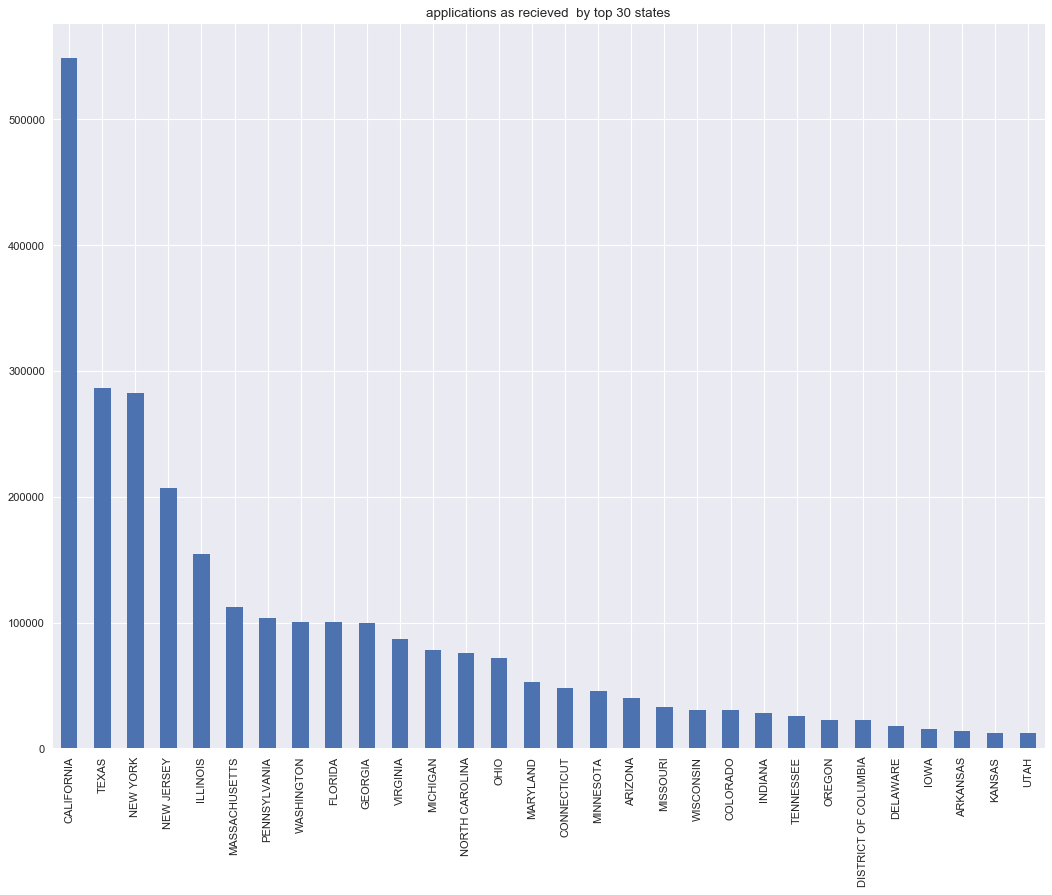

In [77]:
plt.figure(figsize=(16,12), dpi=80, facecolor="w", edgecolor="k")
df['STATE'].value_counts().head(30).plot('bar')
plt.title('applications as recieved  by top 30 states')

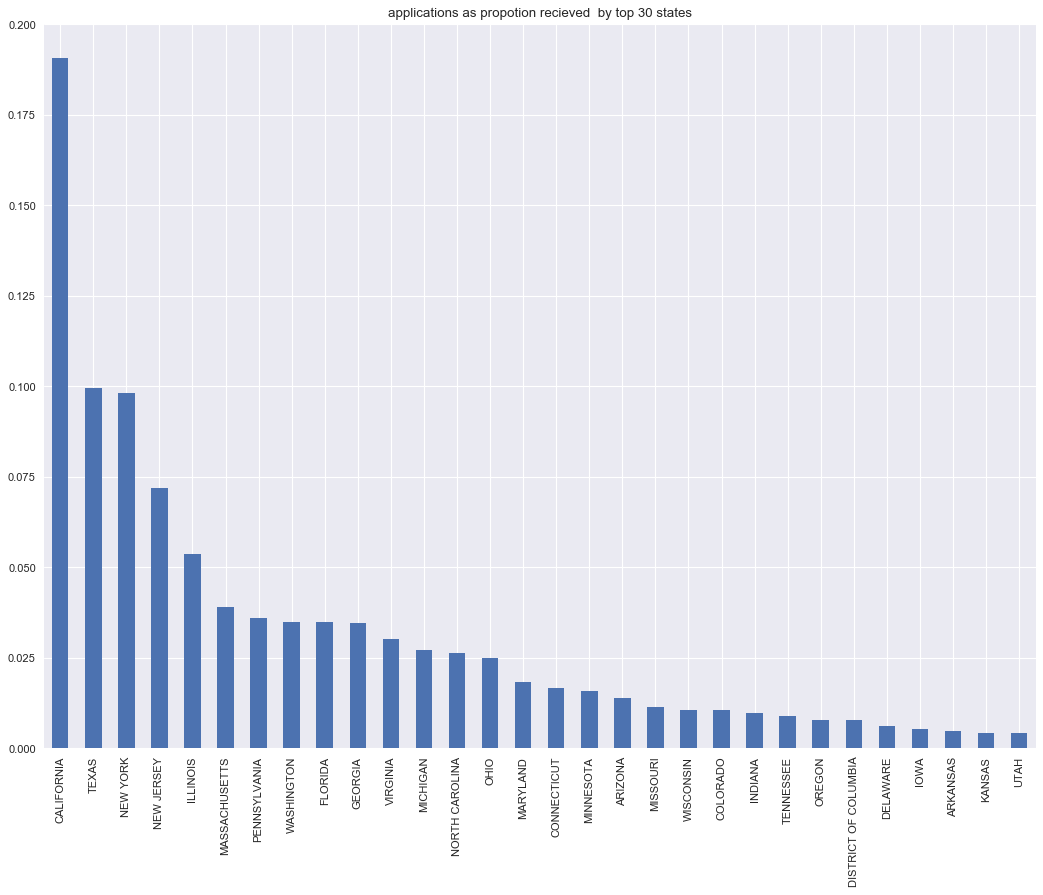

In [78]:
plt.figure(figsize=(16,12), dpi=80, facecolor="w", edgecolor="k")
df['STATE'].value_counts(1).head(30).plot('bar')
plt.title('applications as propotion recieved  by top 30 states')

In [79]:
df['UNIT']=1

In [80]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,LON,LAT,STATE,UNIT
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067,2016,"ANN ARBOR, MICHIGAN",-83.74,42.28,MICHIGAN,1
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674,2016,"PLANO, TEXAS",-96.70,33.02,TEXAS,1
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066,2016,"JERSEY CITY, NEW JERSEY",-74.08,40.73,NEW JERSEY,1
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314,2016,"DENVER, COLORADO",-104.99,39.74,COLORADO,1
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518,2016,"ST. LOUIS, MISSOURI",-90.20,38.63,MISSOURI,1


In [81]:
states=df['STATE'].unique()
states

array(['MICHIGAN', 'TEXAS', 'NEW JERSEY', 'COLORADO', 'MISSOURI',
       'FLORIDA', 'CALIFORNIA', 'VIRGINIA', 'PENNSYLVANIA', 'WISCONSIN',
       'ILLINOIS', 'DISTRICT OF COLUMBIA', 'NORTH CAROLINA',
       'RHODE ISLAND', 'OHIO', 'WASHINGTON', 'GEORGIA', 'NEW YORK',
       'INDIANA', 'MARYLAND', 'MASSACHUSETTS', 'NEVADA', 'NEW HAMPSHIRE',
       'LOUISIANA', 'MINNESOTA', 'SOUTH CAROLINA', 'ARIZONA', 'TENNESSEE',
       'HAWAII', 'UTAH', 'DELAWARE', 'NA', 'KANSAS', 'CONNECTICUT',
       'MAINE', 'OKLAHOMA', 'ARKANSAS', 'PUERTO RICO', 'ALASKA', 'IOWA',
       'OREGON', 'KENTUCKY', 'NEBRASKA', 'NEW MEXICO', 'WEST VIRGINIA',
       'SOUTH DAKOTA', 'NORTH DAKOTA', 'MISSISSIPPI', 'ALABAMA', 'VERMONT',
       'IDAHO', 'WYOMING', 'MONTANA'], dtype=object)

# getting the propotion for certificatio in each states

In [82]:
# getting the propotion for certificatio in each states 
cert_prop=[0]*len(states)
for i,j in enumerate(states):
    df1=df[df['STATE']==j]
    cert_prop[i]=len(df1[df1['CASE_STATUS']=='CERTIFIED'])/len(df1)
cert_prop    

[0.876406225920789,
 0.8668103688821921,
 0.8941684874030821,
 0.8490952995269756,
 0.8697498243577604,
 0.8698398151099777,
 0.8630544045181837,
 0.8733725905138704,
 0.8948799275033983,
 0.8999179924553059,
 0.8870081308163753,
 0.8492056408425562,
 0.888997503335491,
 0.9154294803817603,
 0.8977077962795235,
 0.8775929491633087,
 0.8890538628999087,
 0.8585308165946132,
 0.8442082890541976,
 0.8522156364662715,
 0.8614580282090202,
 0.8129640205596802,
 0.8738559929429927,
 0.8338145972319028,
 0.9048055119483691,
 0.8626178196692157,
 0.8843569579932311,
 0.8623870917934069,
 0.7912575229648401,
 0.8685249136655155,
 0.8788477831121152,
 0.7510589768654284,
 0.8774633038682994,
 0.8945489268069913,
 0.9083652618135377,
 0.8597011762212567,
 0.9064246823956443,
 0.7980665950590763,
 0.782258064516129,
 0.8691804794294393,
 0.8786853552440793,
 0.8931436907366885,
 0.8603488372093023,
 0.8494092373791622,
 0.7718057520037718,
 0.8621997471554994,
 0.847808764940239,
 0.83246463142218

# getting the propotion for Denial in each states

In [83]:
Deniel_prop=[0]*len(states)
for i,j in enumerate(states):
    df1=df[df['STATE']==j]
    Deniel_prop[i]=len(df1[df1['CASE_STATUS']=='DENIED'])/len(df1)
Deniel_prop    

[0.025003852673755586,
 0.028147497070149005,
 0.021694154952725305,
 0.030763123945618736,
 0.020435592754375783,
 0.050446286260758685,
 0.030810935958974658,
 0.030155955283617794,
 0.023040808259985154,
 0.0193537805478104,
 0.0233268536517634,
 0.05141021063905748,
 0.02042245148677032,
 0.0204135737009544,
 0.022016303211872083,
 0.01840125454076265,
 0.02541157114337022,
 0.0419857734156195,
 0.02479631597591215,
 0.035205569667889736,
 0.02990440177881927,
 0.08066818960593947,
 0.018745175873855994,
 0.049586776859504134,
 0.02086603872318158,
 0.0376133736439623,
 0.0256569779016524,
 0.02786999150775882,
 0.09787773202407349,
 0.03831606643644137,
 0.01931657723806834,
 0.187683284457478,
 0.027248398345632956,
 0.02289616805745838,
 0.024265644955300127,
 0.03782981879834693,
 0.019165154264972777,
 0.1514500537056928,
 0.09408602150537634,
 0.021660173017235686,
 0.02416626389560174,
 0.02735229759299781,
 0.027093023255813954,
 0.050698174006444684,
 0.03583215464403583,


In [84]:
df_state_ratio=pd.DataFrame({'ratio_certisfied':cert_prop,'ratio_Denied':Deniel_prop})
df_state_ratio.index=states
df_state_ratio#.sort_values('ratio_Denied',ascending=False)

,ratio_Denied,ratio_certisfied
MICHIGAN,0.025004,0.876406
TEXAS,0.028147,0.866810
NEW JERSEY,0.021694,0.894168
COLORADO,0.030763,0.849095
MISSOURI,0.020436,0.869750
FLORIDA,0.050446,0.869840
CALIFORNIA,0.030811,0.863054
VIRGINIA,0.030156,0.873373
PENNSYLVANIA,0.023041,0.894880
WISCONSIN,0.019354,0.899918


In [85]:
len(states)

53

creating the percentage certisfied

In [86]:
df_state_ratio['percent cetisfied']=df_state_ratio['ratio_certisfied']*100
df_state_ratio.head()

,ratio_Denied,ratio_certisfied,percent cetisfied
MICHIGAN,0.025004,0.876406,87.640623
TEXAS,0.028147,0.866810,86.681037
NEW JERSEY,0.021694,0.894168,89.416849
COLORADO,0.030763,0.849095,84.909530
MISSOURI,0.020436,0.869750,86.974982


# GRAPHING 

THE RATE O F denied APPLICATION 

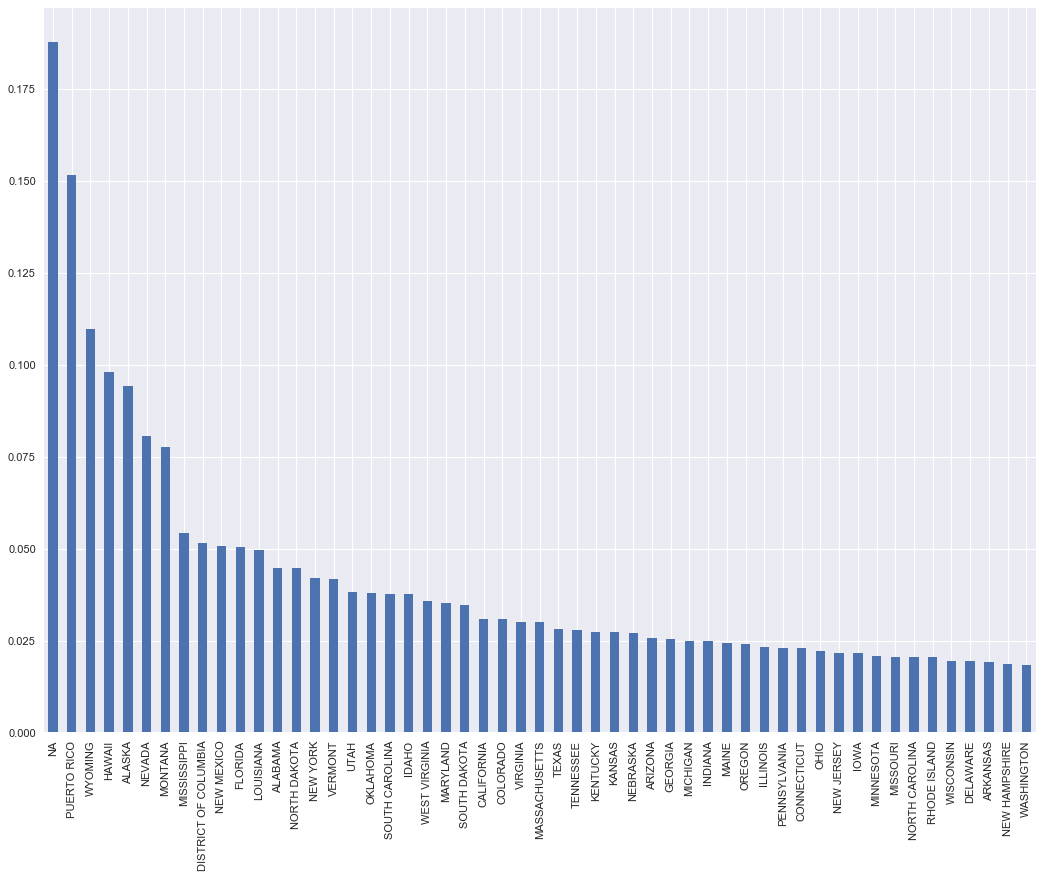

In [87]:
plt.figure(figsize=(16,12), dpi=80, facecolor="w", edgecolor="k")
df_state_ratio.ratio_Denied.sort_values(ascending=False).plot('bar')

<h3> rate of succesfull aplications per state

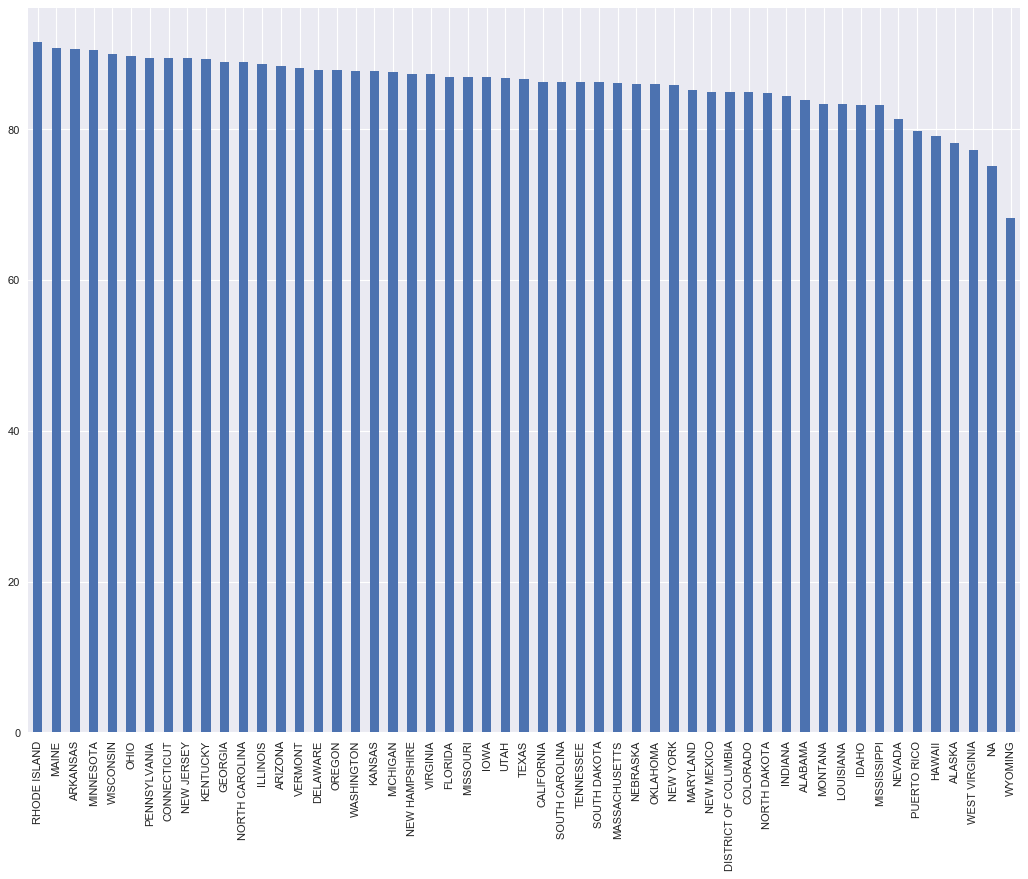

In [88]:
plt.figure(figsize=(16,12), dpi=80, facecolor="w", edgecolor="k")
df_state_ratio['percent cetisfied'].sort_values(ascending=False).plot('bar')

In [89]:
count=df['STATE'].value_counts()

In [90]:
count

CALIFORNIA              548539
TEXAS                   286704
NEW YORK                282429
NEW JERSEY              206876
ILLINOIS                154843
MASSACHUSETTS           112659
PENNSYLVANIA            103729
WASHINGTON              100754
FLORIDA                 100384
GEORGIA                  99679
VIRGINIA                 86948
MICHIGAN                 77868
NORTH CAROLINA           75701
OHIO                     71765
MARYLAND                 53145
CONNECTICUT              48174
MINNESOTA                45864
ARIZONA                  40184
MISSOURI                 32737
WISCONSIN                30485
COLORADO                 30231
INDIANA                  28230
TENNESSEE                25906
OREGON                   22759
DISTRICT OF COLUMBIA     22408
DELAWARE                 17705
IOWA                     15143
ARKANSAS                 13775
KANSAS                   12331
UTAH                     12162
RHODE ISLAND             11316
SOUTH CAROLINA           11246
KENTUCKY

<h3> gettiing the  number of applications recieved by a state in the order

In [91]:
applied=[0]*len(states)
for i,j in enumerate(states):
    df1=df[df['STATE']==j]
    applied[i]=len(df1)
applied    

[77868,
 286704,
 206876,
 30231,
 32737,
 100384,
 548539,
 86948,
 103729,
 30485,
 154843,
 22408,
 75701,
 11316,
 71765,
 100754,
 99679,
 282429,
 28230,
 53145,
 112659,
 7004,
 9069,
 10043,
 45864,
 11246,
 40184,
 25906,
 3157,
 12162,
 17705,
 3069,
 12331,
 48174,
 3132,
 9437,
 13775,
 931,
 1116,
 15143,
 22759,
 10968,
 8600,
 4655,
 2121,
 1582,
 2510,
 2686,
 8644,
 1248,
 3777,
 693,
 644]

# creating a Compete Data Frame

In [92]:
df_state_ratio['number_of_applications']=applied
df_state_ratio['percent_denied']=df_state_ratio['ratio_Denied']*100

In [ ]:
df_state_ratio.head()

,ratio_Denied,ratio_certisfied,percent cetisfied,number_of_applications,percent_denied
MICHIGAN,0.025004,0.876406,87.640623,77868,2.500385
TEXAS,0.028147,0.866810,86.681037,286704,2.814750
NEW JERSEY,0.021694,0.894168,89.416849,206876,2.169415
COLORADO,0.030763,0.849095,84.909530,30231,3.076312
MISSOURI,0.020436,0.869750,86.974982,32737,2.043559


# checking from the table ,the worst states to apply for a job

In [ ]:
df_state_ratio.sort_values('percent_denied',ascending=False).head(10)

# TOP 10 JOBS 

In [ ]:
df['JOB_TITLE'].value_counts().head(20)